In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import missingno as msno  # Optional: for visualizing missing data

In [14]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('Iris.csv')  # Replace "Iris.csv" with your actual file path

# Display the first few rows of the dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


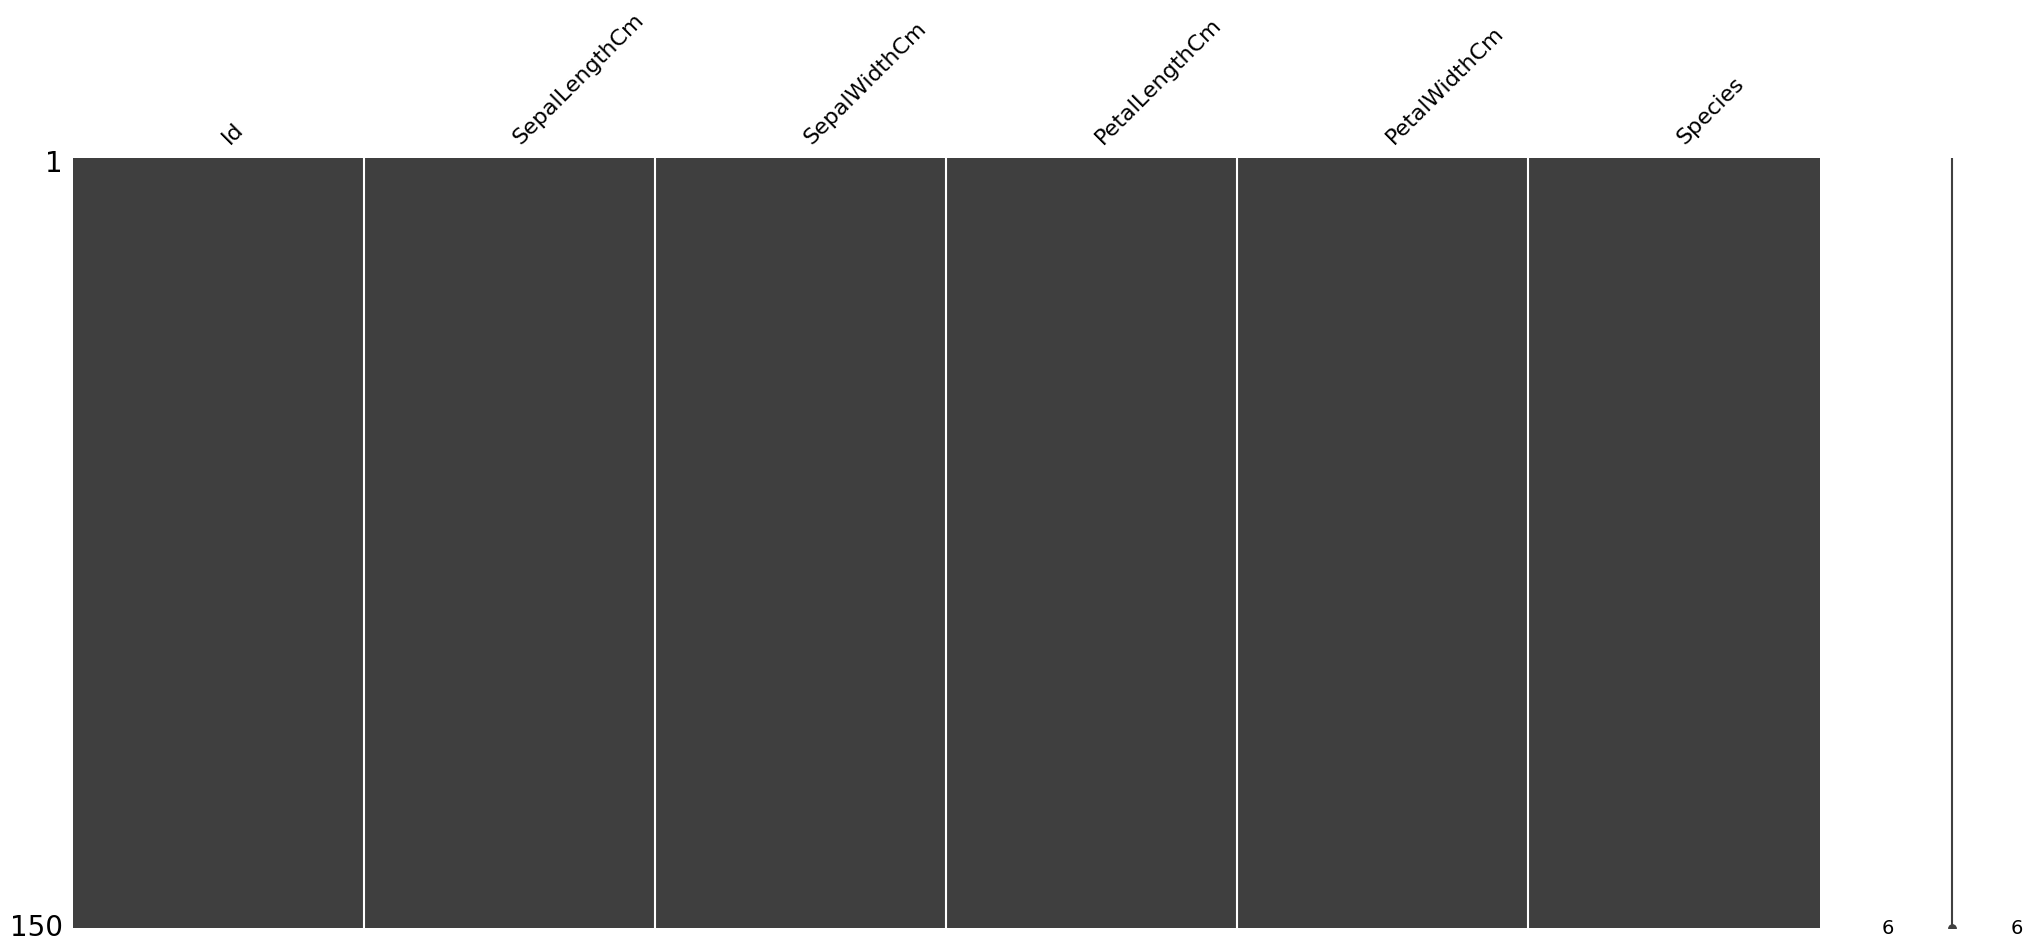

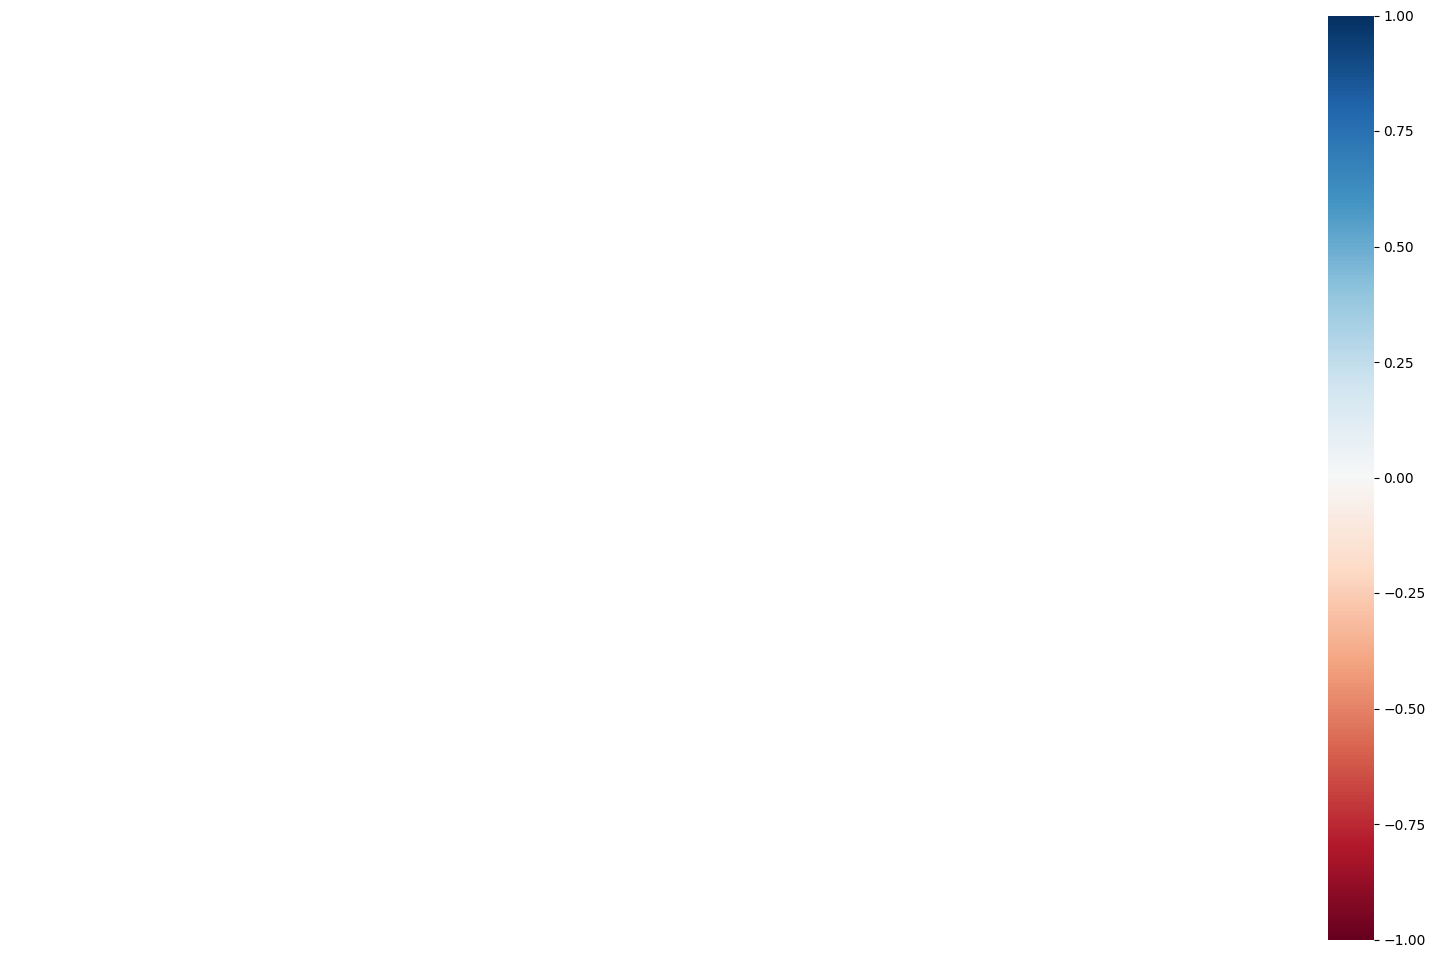

In [16]:
# Visualize missing data (optional)
msno.matrix(df)
msno.heatmap(df)

# Drop rows with missing values
df_cleaned = df.dropna()

# Or, fill missing values with the mean
df_filled = df.fillna(df.mean(numeric_only=True))

In [21]:
from scipy import stats

numeric_cols = df_cleaned.select_dtypes(include='number')

z_scores = np.abs(stats.zscore(numeric_cols))
df_no_outliers = df_cleaned[(z_scores < 3).all(axis=1)]

for col in numeric_cols.columns:
    upper_limit = df_cleaned[col].quantile(0.95)
    df_cleaned[col] = np.where(df_cleaned[col] > upper_limit, upper_limit, df_cleaned[col])

In [23]:
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_numeric = df_cleaned[numeric_cols]

# Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

# Z-score Standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

In [25]:
# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Species'])

print(df_encoded.columns.tolist())  # Result

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']


In [26]:
# Save the cleaned and preprocessed DataFrame to a new CSV file
df_encoded.to_csv('cleaned_preprocessed_data.csv', index=False)

print('Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv')

Data cleaning and preprocessing complete. File saved as cleaned_preprocessed_data.csv


In [ ]:
# WE CAN AUTOMATE IT WITH THIS CODE

def load_data(filepath):
    return pd.read_csv(filepath)

def handle_missing_values(df):
    return df.fillna(df.mean())

def remove_outliers(df):
    z_scores = np.abs(stats.zscore(df))
    return df[(z_scores < 3).all(axis=1)]

def scale_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

def encode_categorical(df, categorical_columns):
    return pd.get_dummies(df, columns=categorical_columns)

def save_data(df, output_filepath):
    df.to_csv(output_filepath, index=False)

# Example usage:
df = load_data('your_dataset.csv')
df = handle_missing_values(df)
df = remove_outliers(df)
df = scale_data(df)
df = encode_categorical(df, ['categorical_column_name'])
save_data(df, 'cleaned_preprocessed_data.csv')